In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/food_delivery.csv')
df.head()


,Restaurant_Rating,Delivery_Distance_km,Delivery_Person_Age,Traffic_Conditions,Weather_Conditions,Delivery_Time
0,4.5,3.2,25,Low,Clear,30
1,3.2,5.5,32,High,Rainy,50
2,4.0,2.8,29,Medium,Cloudy,28
3,4.8,4.0,24,Low,Clear,32
4,3.9,3.5,27,High,Rainy,45


In [2]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_Rating     10 non-null     float64
 1   Delivery_Distance_km  10 non-null     float64
 2   Delivery_Person_Age   10 non-null     int64  
 3   Traffic_Conditions    10 non-null     object 
 4   Weather_Conditions    10 non-null     object 
 5   Delivery_Time         10 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 612.0+ bytes
None
       Restaurant_Rating  Delivery_Distance_km  Delivery_Person_Age  \
count           10.00000             10.000000             10.00000   
mean             3.91000              4.190000             28.50000   
std              0.57436              1.126893              3.02765   
min              2.90000              2.800000             24.00000   
25%              3.60000              3.275000             26.25

In [3]:
# Drop missing values if any
df = df.dropna()

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Features and target
X = df.drop('Delivery_Time', axis=1)
y = df['Delivery_Time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 9.968417639901123


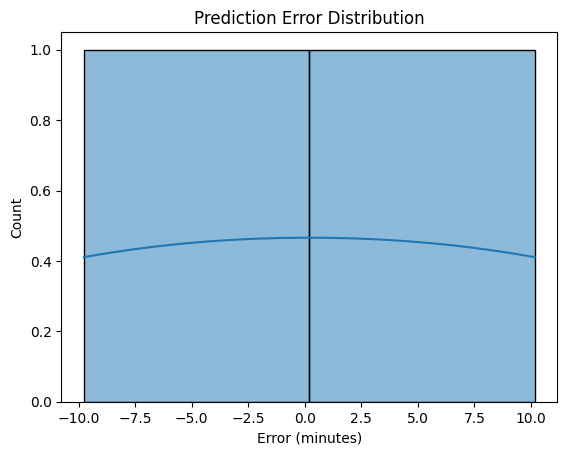

In [5]:
sns.histplot(y_test - y_pred, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (minutes)")
plt.show()
